In [2]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import DNSmodule as dns
import numpy as np
import seaborn as sns

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
colours = ['#df1e36','#c9c900','#091f3f']
cols = ['#df1e36','#c9c900','#091f3f']
red  = cols[0]
yel  = cols[1]
blue = cols[2]
colormp = LinearSegmentedColormap.from_list('Green_r',colours)



# Compare Eu HD vs. Eu MHD_hel vs Eu MHD_nonhel

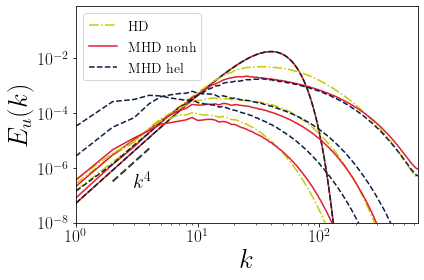

In [12]:
Eks_hydro = dns.E_spectrum('HYDRO/kc.u_2048_0.0003125.spc')
Eks_mhd = dns.E_spectrum('NH_v0.0003125/nhG.b_2048_0.0003125_1.spc')
Eks_mhd_hel = dns.E_spectrum('H_v0.0003125/hG.b_2048_0.0003125_1.spc')
#plt.style.use('ggplot')
fig, ax = plt.subplots()
k = np.arange(1,341,1)
k2048 = np.arange(1,int(2048/3),1)
N = len(Eks_hydro)
t = [0,16,128,499]
#t = 1]
for idx_t in t:
    if idx_t == 0 :
        lab_hd = 'HD'
        lab_mhd = 'MHD nonh'
        lab_mhd2 = 'MHD hel'
    else:
        lab_hd = '__nolegend__'
        lab_mhd = '__nolegend__'
        lab_mhd2 = '__nolegend__'
   
    
    ax.plot(k2048,Eks_hydro[idx_t],lw=1.5,ls = '-.', c=colours[1],label = lab_hd)
    ax.plot(k2048,Eks_mhd[idx_t],lw=1.5,ls = '-',c=colours[0],label = lab_mhd)
    ax.plot(k2048,Eks_mhd_hel[idx_t],ls='--',lw = 1.5,c=colours[2],label = lab_mhd2)
    
k_slope = np.array([2,4])
ax.plot(k_slope,2e-8*np.power(k_slope,4),c='0.2',lw=2,ls='--')
ax.text(3,2e-7,'$k^{4}$',size=20)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_u(k)$',fontsize=27)
ax.set_xlabel('$k$',fontsize=27)
ax.legend(fontsize=14,loc=2)
ax.set_ylim(1e-8,8e-1)
ax.set_xlim(1,641)
fig.tight_layout()
fig.savefig('comparison_HD_MHD_hel_nonh_paper.pdf',format='pdf')



In [14]:
f_hyd = 'HYDRO/kc.u_2048_0.0003125.spc'
f_mhd = 'NH_v0.0003125/nhG.b_2048_0.0003125_1.spc'
f_mhd_hel = 'H_v0.0003125/hG.b_2048_0.0003125_1.spc'
E_hyd = dns.col_Ehyd(f_hyd)
E_mhd= dns.col_E(f_mhd)
E_mhd_hel = dns.col_E(f_mhd_hel)
L_hyd = dns.col_Lhyd(f_hyd)
L_mhd = dns.col_L(f_mhd)
L_mhd_hel = dns.col_L(f_mhd_hel)


t_hyd = dns.col_thyd(f_hyd)


t_mhd = dns.col_t(f_mhd)


t_mhd_hel = dns.col_t(f_mhd_hel)

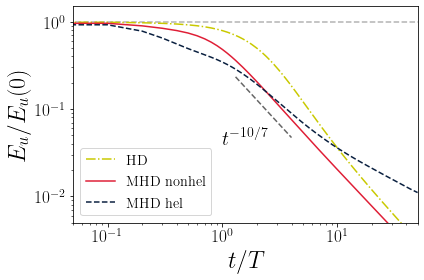

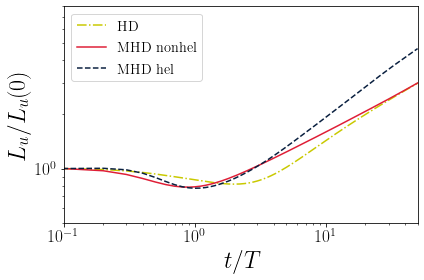

In [4]:

figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_hyd[250:]), np.log(E_hyd[250:]), 1)
p_hyd = mp
mq, bq = np.polyfit(np.log(t_hyd[250:]), np.log(L_hyd[250:]), 1)
q_hyd = mq

mp, bp = np.polyfit(np.log(t_mhd[250:]), np.log(E_mhd[250:]), 1)
p_mhd = mp
mq, bq = np.polyfit(np.log(t_mhd[250:]), np.log(L_mhd[250:]), 1)
q_mhd = mq

mp, bp = np.polyfit(np.log(t_mhd_hel[250:]), np.log(E_mhd_hel[250:]), 1)
p_mhd_hel = mp
mq, bq = np.polyfit(np.log(t_mhd_hel[250:]), np.log(L_mhd_hel[250:]), 1)
q_mhd_hel = mq




axE.plot(t_hyd/0.1,E_hyd/E_hyd[0],linestyle = '-.',c=colours[1],label = 'HD')
axE.plot(t_mhd/0.1,E_mhd/(E_mhd[0]),linestyle = '-',c=colours[0],label = 'MHD nonhel')
axE.plot(t_mhd_hel/0.1,E_mhd_hel/(E_mhd_hel[0]),linestyle = '--',c=colours[2],label = 'MHD hel')

axE.plot(t_hyd[130:400],np.power(t_hyd[130:400],-10/7)*np.exp(bp)*1e1/E_hyd[1],ls='--',c='0.4')
axE.text(1,4e-2,'$t^{-10/7}$',size= 20)


axE.set_xlabel('$t/T$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.05,50))
axE.set_ylim((5e-3,1.5))




axL.plot(t_hyd/0.1,L_hyd/L_hyd[1],linestyle = '-.',c=colours[1],label = 'HD')
axL.plot(t_mhd/0.1,L_mhd/L_mhd[1],linestyle = '-',c=colours[0],label = 'MHD nonhel')
axL.plot(t_mhd_hel/0.1,L_mhd_hel/L_mhd_hel[1],linestyle = '--',c=colours[2],label = 'MHD hel')

axL.set_xlabel('$t/T$',size=24)

axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(1e-1,50)
axL.set_ylim(5e-1,8)

axE.set_ylabel('$E_u/E_u(0)$',size=24)
axL.set_ylabel('$L_u/L_u(0)$',size=24)
axE.legend()
axL.legend()



figE.tight_layout()
figL.tight_layout()

plt.show()


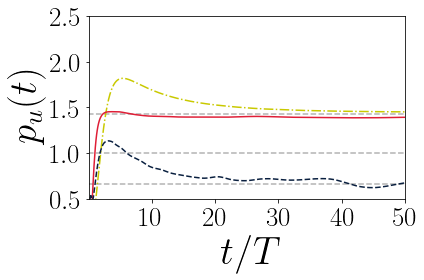

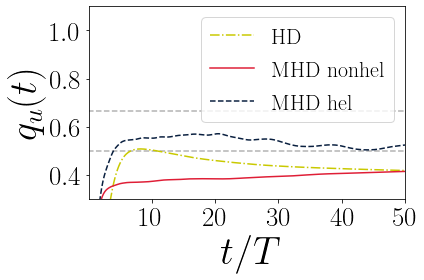

[ 0.   1.6 12.8 49.9]


In [32]:
figp, axp = plt.subplots()

phyd = -np.gradient(np.log(E_hyd[1:]),np.log(t_hyd[1:]))
pmhd = -np.gradient(np.log(E_mhd[1:]),np.log(t_mhd[1:]))
pmhdhel =  -np.gradient(np.log(E_mhd_hel[1:]),np.log(t_mhd_hel[1:]))

axp.plot(t_hyd[1:]/0.1,phyd,linestyle = '-.',c=colours[1],label = 'HD')
axp.plot(t_mhd[1:]/0.1,pmhd,linestyle = '-',c=colours[0],label = 'MHD nonhel')
axp.plot(t_mhd_hel[1:]/0.1,pmhdhel,linestyle = '--',c=colours[2],label = 'MHD hel')


axp.set_xlabel('$t/T$',size=39)

axp.hlines(np.array([2/3,1,10/7]),0,50,colors='0.7',ls = '--')
#axp.set_xscale('log')
#axp.set_yscale('log')
axp.set_xlim((1e-1,50))
axp.set_ylim((0.5,2.5))
axp.set_ylabel('$p_u(t)$',size=39)
#axp.legend(fontsize=17)
plt.setp(axp.get_xticklabels(), fontsize=27)
plt.setp(axp.get_yticklabels(), fontsize=27)
figp.tight_layout()
figp.savefig('hydro_p_paper.pdf',format='pdf')

figq, axq = plt.subplots()



qhyd = np.gradient(np.log(L_hyd[1:]),np.log(t_hyd[1:]))
qmhd = np.gradient(np.log(L_mhd[1:]),np.log(t_mhd[1:]))
qmhdhel =  np.gradient(np.log(L_mhd_hel[1:]),np.log(t_mhd_hel[1:]))

axq.plot(t_hyd[1:]/0.1,qhyd,linestyle = '-.',c=colours[1],label = 'HD')
axq.plot(t_mhd[1:]/0.1,qmhd,linestyle = '-',c=colours[0],label = 'MHD nonhel')
axq.plot(t_mhd_hel[1:]/0.1,qmhdhel,linestyle = '--',c=colours[2],label = 'MHD hel')


axq.set_xlabel('$t/T$',size=39)

axq.hlines(np.array([2/3,1/2]),0,50,colors='0.7',ls = '--')
#axq.set_xscale('log')
#axq.set_yscale('log')
axq.set_xlim((1e-1,50))
axq.set_ylim((3e-1,1.1))
axq.set_ylabel('$q_u(t)$',size=39)
axq.legend(fontsize=22)
plt.setp(axq.get_xticklabels(), fontsize=27)
plt.setp(axq.get_yticklabels(), fontsize=27)
figq.tight_layout()
figq.savefig('hydro_q_paper.pdf',format='pdf')


plt.show()

t = np.array([0,0.16,1.28,4.99])
print(t/0.1)



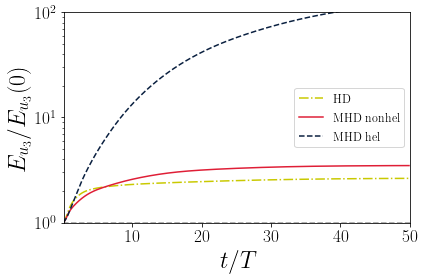

In [7]:

figE, axE0 = plt.subplots()

E_hyd = dns.col_Ehyd(f_hyd)
E_mhd= dns.col_E(f_mhd)
E_mhd_hel = dns.col_E(f_mhd_hel)

Eks_hydro 
Eks_mhd
Eks_mhd_hel 


k2048 = np.arange(1,int(2048/3),1)

t_hyd = dns.col_thyd(f_hyd)


t_mhd = dns.col_t(f_mhd)


t_mhd_hel = dns.col_t(f_mhd_hel)


E3_hyd = dns.integrate(Eks_hydro,0,3,k2048)
E3_mhd = dns.integrate(Eks_mhd,0,3,k2048)
E3_mhd_hel = dns.integrate(Eks_mhd_hel,0,3,k2048)

axE0.plot(t_hyd[:-1]/0.1, E3_hyd/E3_hyd[0], color=colours[1],ls='-.',label='HD')
axE0.plot(t_mhd[:-1]/0.1, E3_mhd/E3_mhd[0], color=colours[0],ls='-',label='MHD nonhel')
axE0.plot(t_mhd_hel[:-1]/0.1, E3_mhd_hel/E3_mhd_hel[0], color=colours[2],ls='--',label='MHD hel')

    
    
#axE.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{u_3}/E_{u_3}(0)$',size = 24)
axE0.set_xlabel('$t/T$',size = 24)
axE0.legend(fontsize=12)
axE0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-1,50)
axE0.set_ylim(1,1e2)


figE.tight_layout()
figE.savefig('E3_vs_t_comparison_MHD_HD.pdf',format='pdf')

plt.show()

In [448]:
def Lkol(eps,visc):
    return np.power((visc**3)/(eps),1/4)

Pm = 1
visc = 0.0009
N = 512
kmax = int(N/3)-1
print('k_max = ',kmax)
print('Pm = ',Pm)
print('$visc = $', visc)
eta = visc/Pm
Lkol(0.1,eta) * kmax

k_max =  169
Pm =  1
$visc = $ 0.0009


1.5615956361381984

In [396]:
0.75/1000


0.00075